In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline 

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/california-housing-prices/housing.csv


In [2]:
df=pd.read_csv("../input/california-housing-prices/housing.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [3]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [4]:
from sklearn.preprocessing import LabelBinarizer

lb=LabelBinarizer()
prox=lb.fit_transform(df["ocean_proximity"])
df=df.drop("ocean_proximity",axis=1)

In [5]:
print(prox)
prox_df=pd.DataFrame(prox,columns=["<1H Ocean","Inland","Near Ocean","Near Bay","Island"])


[[0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 ...
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]]


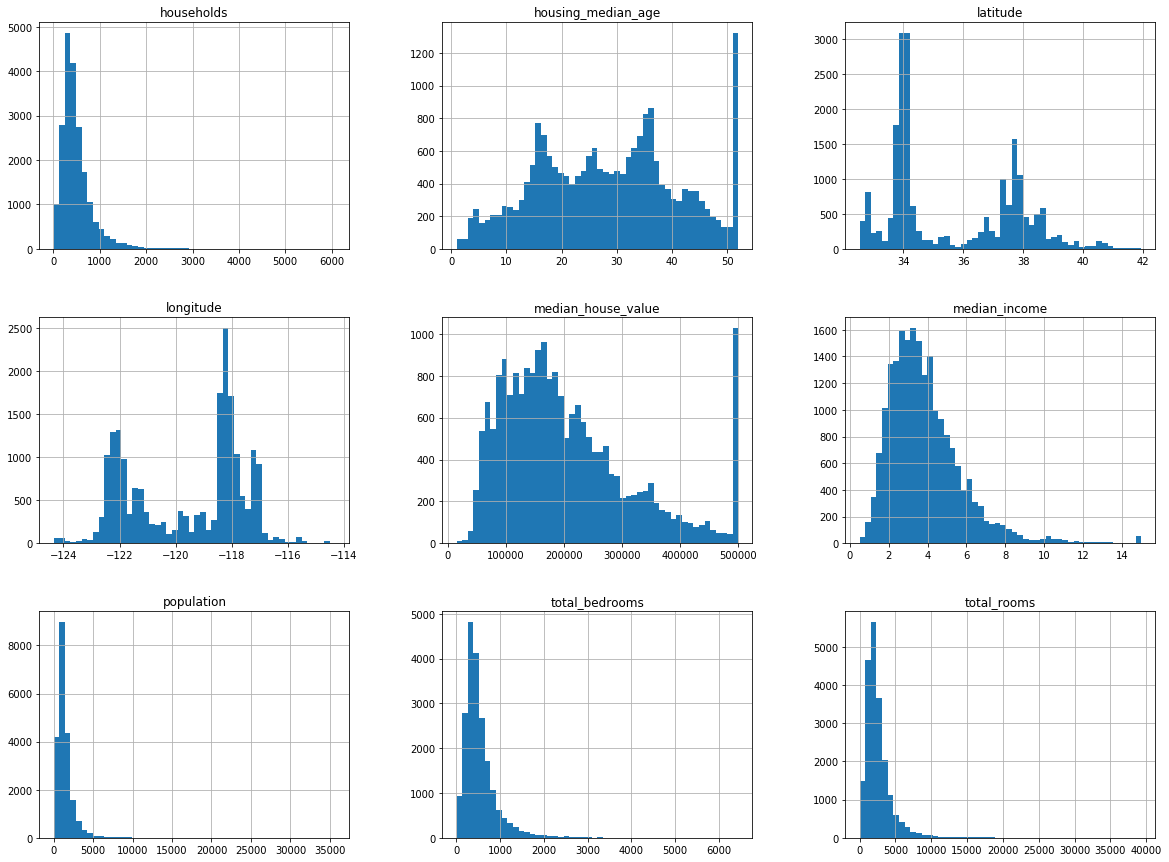

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
df.hist(bins=50,figsize=(20,15))
plt.show()

In [7]:
#fill n/a 
df["total_bedrooms"]=df["total_bedrooms"].fillna(df["total_bedrooms"].median())

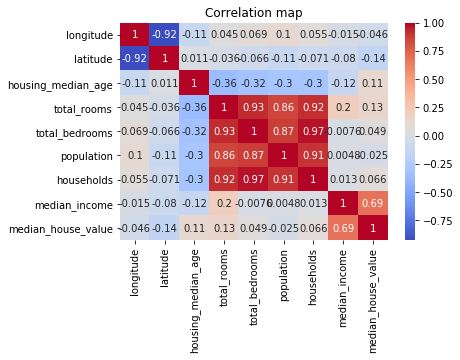

In [8]:
import seaborn as sns

corr_matrix=df.corr()
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title("Correlation map")
plt.show()


**median house value**-{median income,total rooms,age,latitude}.

**household**-{total bedroom, total room}


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc5ac702518>,
      dtype=object)

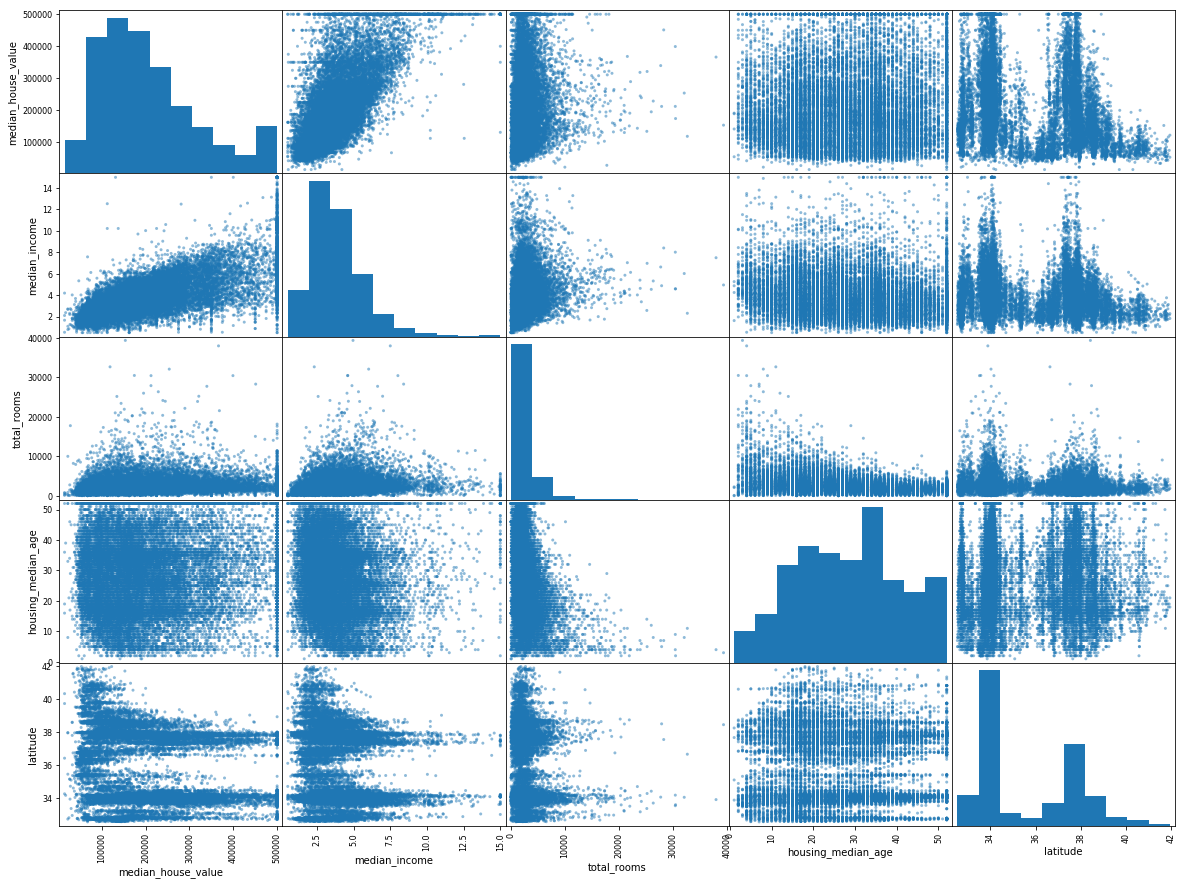

In [9]:
from pandas.plotting import scatter_matrix

corr1=["median_house_value","median_income","total_rooms","housing_median_age","latitude"]
scatter_matrix(df[corr1],figsize=(20,15))

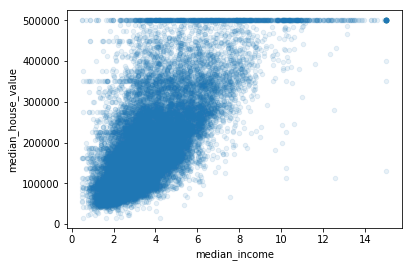

In [10]:
df.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.1)
plt.show()
#outliers detected

In [11]:
#remove outliers
df=df[df["median_house_value"]<500000]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


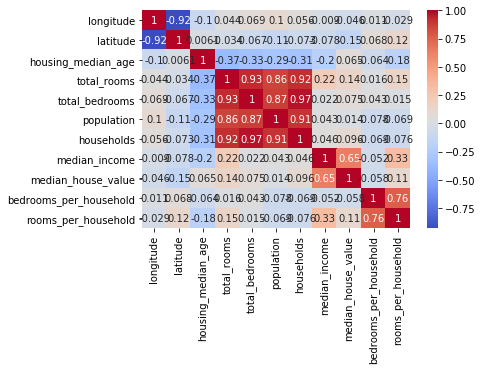

In [12]:
df["bedrooms_per_household"]=df["total_bedrooms"]/df["households"]
df["rooms_per_household"]=df["total_rooms"]/df["households"]

corr_matrix=df.corr()
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm")
plt.show()


In [13]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)

NameError: name 'housing' is not defined

**Areas closer to shore are more expensive.**

In [14]:
df=df.drop(["total_rooms","total_bedrooms"],axis=1)

df["<1H Ocean"]=prox_df["<1H Ocean"]
df["Inland"]=prox_df["Inland"]
df["Near Ocean"]=prox_df["Near Ocean"]
df["Near Bay"]=prox_df["Near Bay"]
df["Island"]=prox_df["Island"]
df

,longitude,latitude,housing_median_age,population,households,median_income,median_house_value,bedrooms_per_household,rooms_per_household,<1H Ocean,Inland,Near Ocean,Near Bay,Island
0,-122.23,37.88,41.0,322.0,126.0,8.3252,452600.0,1.023810,6.984127,0,0,0,1,0
1,-122.22,37.86,21.0,2401.0,1138.0,8.3014,358500.0,0.971880,6.238137,0,0,0,1,0
2,-122.24,37.85,52.0,496.0,177.0,7.2574,352100.0,1.073446,8.288136,0,0,0,1,0
3,-122.25,37.85,52.0,558.0,219.0,5.6431,341300.0,1.073059,5.817352,0,0,0,1,0
4,-122.25,37.85,52.0,565.0,259.0,3.8462,342200.0,1.081081,6.281853,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,845.0,330.0,1.5603,78100.0,1.133333,5.045455,0,1,0,0,0
20636,-121.21,39.49,18.0,356.0,114.0,2.5568,77100.0,1.315789,6.114035,0,1,0,0,0
20637,-121.22,39.43,17.0,1007.0,433.0,1.7000,92300.0,1.120092,5.205543,0,1,0,0,0
20638,-121.32,39.43,18.0,741.0,349.0,1.8672,84700.0,1.171920,5.329513,0,1,0,0,0


In [15]:
#train test split
from sklearn.model_selection import train_test_split

y=df["median_house_value"]
X=df.drop(["median_house_value"],axis=1)
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.2, random_state=42)


In [16]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
cols=["longitude","latitude","housing_median_age","population","households","median_income","bedrooms_per_household","rooms_per_household"]
X_train[cols]=ss.fit_transform(X_train[cols])
X_test[cols]=ss.transform(X_test[cols])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.py

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test.iloc[:786])
rms=mean_squared_error(pred,y_test.iloc[:786])
print(rms)

3706799383.679983


In [18]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)
pred=tree_reg.predict(X_test.iloc[:786])
rms=mean_squared_error(pred,y_test.iloc[:786])
print(rms)
tree_reg.score(X_train,y_train)

4345535175.5737915


1.0

In [19]:
output_csv = pd.DataFrame({'Label':pred})

output_csv.to_csv('output.csv',index=False)